In [1]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
country = geopandas.read_file("aus.json")   #file is from https://geojson-maps.ash.ms/
country.head()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,5,Admin-0 country,5,Australia,AU1,1,2,Dependency,Ashmore and Cartier Islands,ATC,...,Oceania,Australia and New Zealand,East Asia & Pacific,23,27,7,-99,-99,ashmoreandcartieris.geojson,"POLYGON ((123.59453 -12.42568, 123.59521 -12.4..."
1,3,Admin-0 country,6,United States of America,US1,1,2,Dependency,Guam,GUM,...,Oceania,Micronesia,East Asia & Pacific,4,4,4,2,-99,GUM.geojson,"POLYGON ((144.74180 13.25928, 144.69951 13.257..."
2,3,Admin-0 country,4,United States of America,US1,1,2,Dependency,American Samoa,ASM,...,Oceania,Polynesia,East Asia & Pacific,14,14,9,3,-99,ASM.geojson,"POLYGON ((-170.72627 -14.35117, -170.76924 -14..."
3,5,Admin-0 country,6,Marshall Islands,MHL,0,2,Sovereign country,Marshall Islands,MHL,...,Oceania,Micronesia,East Asia & Pacific,12,16,6,2,1,MHL.geojson,"MULTIPOLYGON (((169.63506 5.83008, 169.61543 5..."
4,3,Admin-0 country,4,New Zealand,NZ1,1,2,Dependency,Cook Islands,COK,...,Oceania,Polynesia,East Asia & Pacific,8,12,8,3,-99,COK.geojson,"POLYGON ((-159.74053 -21.24922, -159.77256 -21..."


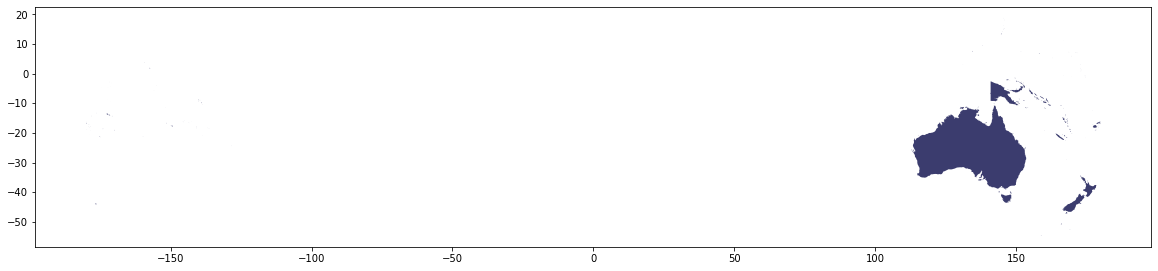

In [4]:
country.plot(figsize=(20,50), color='#3B3C6E')

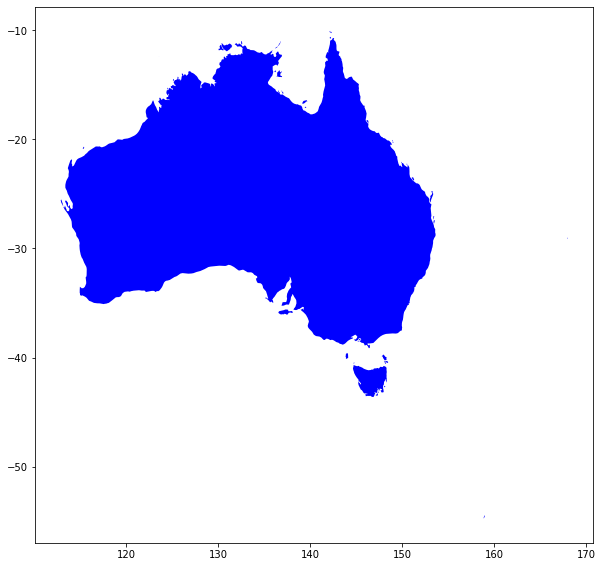

In [54]:
country[country['sovereignt'].isin(['Australia']) == True].plot(figsize=(10,10), color='blue');


In [6]:
aus_weather =pd.read_csv('Aus weather.csv',encoding='ISO-8859–1')
aus_weather.tail()

,Event ID,Database,ID,Date/Time,Nearest town,State,Latitude,Longitude,Comments,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
5193,81699,Wind,8288,28/12/2019 11:29,DELAMERE BOMBING RANGE,NT,-15.6591,131.9163,53KT reported at Delamere,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5194,81700,Wind,8289,31/12/2019 5:00,WOLLOGORANG,NT,-17.2167,137.9667,Reports of fallen trees around Wollogorang nea...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5195,81701,Wind,8290,27/11/2020 1:12,Darwin Airport,NT,0.0000,0.0000,1542Z or 1:12am on 27/11/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5196,81701,Wind,8291,27/11/2020 1:12,Darwin Airport,NT,0.0000,0.0000,1542Z or 1:12am on 27/11/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5197,81705,Rain,6584,26/12/2020 6:30,NOONAMAH,NT,-12.6441,131.0917,85.8mm/hr fell at Batchelor as well between 05...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
aus_weather['coordinates'] = aus_weather[['Longitude', 'Latitude']].values.tolist() # Longitude first, followed by Latitude
aus_weather.head()

,Event ID,Database,ID,Date/Time,Nearest town,State,Latitude,Longitude,Comments,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,coordinates
0,23725,Wind,5620,3/01/2010 1:30,ARMIDALE,NSW,-30.5151,151.6650,Weatherzone photos near Armidale showed trees ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[151.665, -30.5151]"
1,23726,Rain,3377,4/01/2010 6:25,INVERELL,NSW,-29.7817,151.1178,Spotter reported 58mm of rain about 11km north...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[151.1178, -29.7817]"
2,23727,Wind,5621,5/01/2010 0:43,WAGGA WAGGA AERODROME,NSW,-35.1318,147.4179,51 knot gust recorded at Wagga Wagga airport ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[147.4179, -35.1318]"
3,23728,Rain,3378,5/01/2010 8:00,SPRINGWOOD,NSW,-33.6984,150.5679,Spotter reported 50mm of rain at Springwood st...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[150.5679, -33.6984]"
4,23729,Rain,3379,5/01/2010 7:00,CANOWINDRA,NSW,-33.5651,148.6512,Spotter reported 30mm of rain at Canowindra in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[148.6512, -33.5651]"


In [8]:
aus_weather['coordinates'] = aus_weather['coordinates'].apply(Point)
aus_weather.head()

,Event ID,Database,ID,Date/Time,Nearest town,State,Latitude,Longitude,Comments,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,coordinates
0,23725,Wind,5620,3/01/2010 1:30,ARMIDALE,NSW,-30.5151,151.6650,Weatherzone photos near Armidale showed trees ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (151.665 -30.5151)
1,23726,Rain,3377,4/01/2010 6:25,INVERELL,NSW,-29.7817,151.1178,Spotter reported 58mm of rain about 11km north...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (151.1178 -29.7817)
2,23727,Wind,5621,5/01/2010 0:43,WAGGA WAGGA AERODROME,NSW,-35.1318,147.4179,51 knot gust recorded at Wagga Wagga airport ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (147.4179 -35.1318)
3,23728,Rain,3378,5/01/2010 8:00,SPRINGWOOD,NSW,-33.6984,150.5679,Spotter reported 50mm of rain at Springwood st...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (150.5679 -33.6984)
4,23729,Rain,3379,5/01/2010 7:00,CANOWINDRA,NSW,-33.5651,148.6512,Spotter reported 30mm of rain at Canowindra in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (148.6512 -33.5651)


In [9]:
type(aus_weather)

pandas.core.frame.DataFrame

In [121]:
aus_weather['Database'].unique()

array(['Wind', 'Rain', 'Hail', 'Tornado', 'Lighting', 'Waterspout'],
      dtype=object)

In [10]:
aus_weather= geopandas.GeoDataFrame(aus_weather, geometry='coordinates')
aus_weather.head()

,Event ID,Database,ID,Date/Time,Nearest town,State,Latitude,Longitude,Comments,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,coordinates
0,23725,Wind,5620,3/01/2010 1:30,ARMIDALE,NSW,-30.5151,151.6650,Weatherzone photos near Armidale showed trees ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (151.66500 -30.51510)
1,23726,Rain,3377,4/01/2010 6:25,INVERELL,NSW,-29.7817,151.1178,Spotter reported 58mm of rain about 11km north...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (151.11780 -29.78170)
2,23727,Wind,5621,5/01/2010 0:43,WAGGA WAGGA AERODROME,NSW,-35.1318,147.4179,51 knot gust recorded at Wagga Wagga airport ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (147.41790 -35.13180)
3,23728,Rain,3378,5/01/2010 8:00,SPRINGWOOD,NSW,-33.6984,150.5679,Spotter reported 50mm of rain at Springwood st...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (150.56790 -33.69840)
4,23729,Rain,3379,5/01/2010 7:00,CANOWINDRA,NSW,-33.5651,148.6512,Spotter reported 30mm of rain at Canowindra in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (148.65120 -33.56510)


In [11]:
type(aus_weather)

geopandas.geodataframe.GeoDataFrame

In [12]:
type(aus_weather['coordinates'])

geopandas.geoseries.GeoSeries

In [66]:
aus_weather['Database'].isin(['Lighting'])

0       False
1       False
2       False
3       False
4       False
        ...  
5193    False
5194    False
5195    False
5196    False
5197    False
Name: Database, Length: 5198, dtype: bool

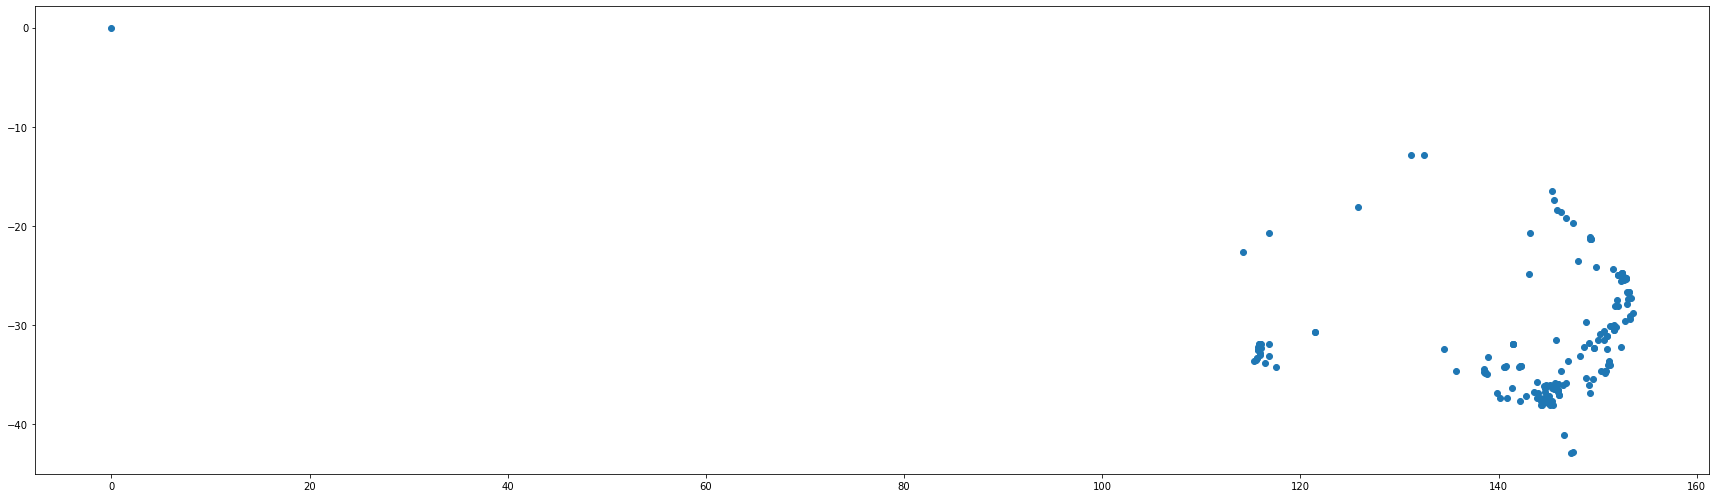

In [55]:
aus_weather.loc[aus_weather['Database'].isin(['Tornado'])].plot(figsize=(30,30));

<Figure size 1440x2160 with 0 Axes>

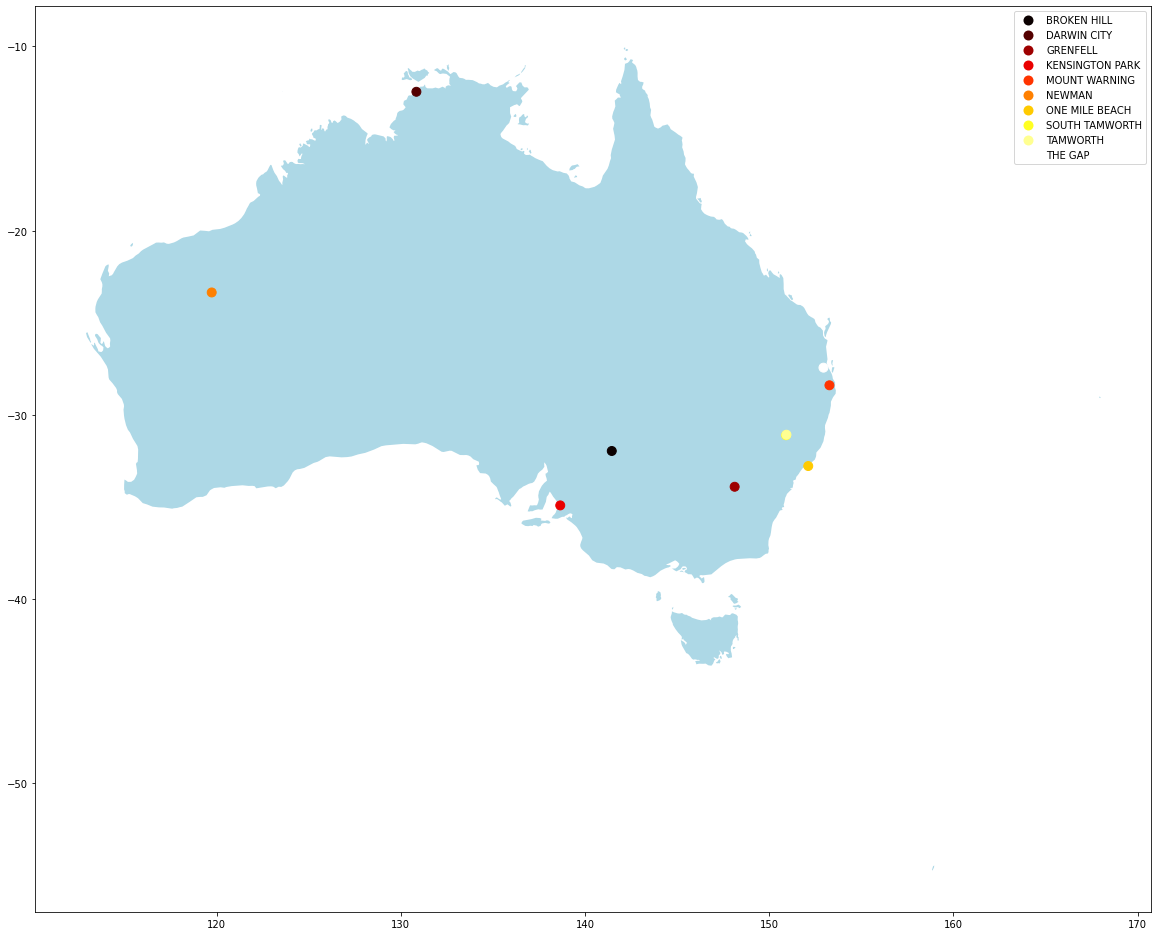

In [119]:
fig, ax = plt.subplots(0,figsize=(20,30))
base = country[country['sovereignt'].isin(['Australia']) == True].plot(figsize=(20,30), color='lightblue');
aus_weather.loc[aus_weather['Database'].isin(['Lighting'])].plot(ax=base, column='Nearest town', marker="o", markersize=80, cmap='hot', label="State",legend=True)

plt.savefig('Weather Events in AUS Map.png',bbox_inches='tight');